Mean Absolute Error (MAE): 3.1113773882381817
Root Mean Squared Error (RMSE): 4.772599769922686


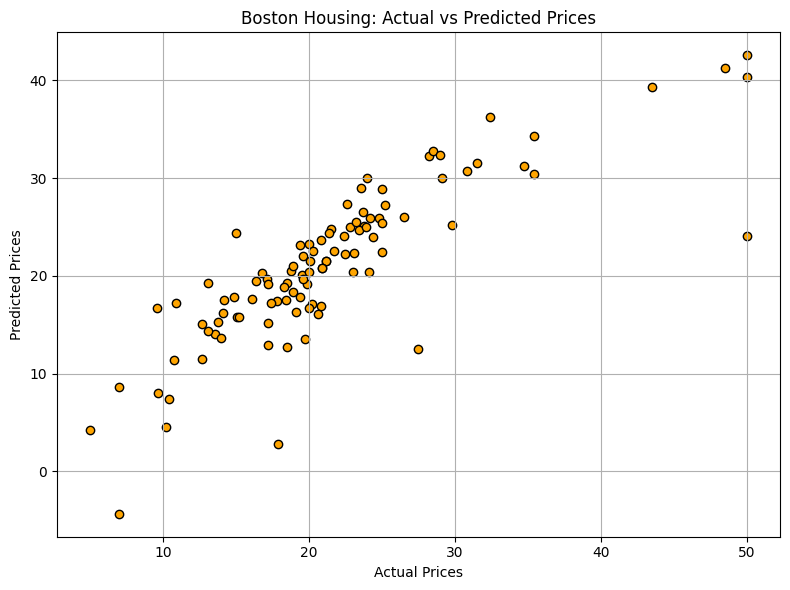

In [12]:

# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset from CSV
data = pd.read_csv("/content/Boston.csv")  # Make sure this file is in the same folder

# Step 2: Check for missing values
data = data.dropna()

# Step 3: Feature and target separation
features = data.drop("MEDV", axis=1)  # 'medv' is the target column (median value of house)
target = data["MEDV"]

# Step 4: Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions and evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 8: Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', edgecolor='k')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Boston Housing: Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.savefig("actual_vs_predicted.png")
plt.show()
